<a href="https://colab.research.google.com/github/Lyu-Sterkh/Sentiment-analysis/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud


import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px

# Google Drive

In [2]:
# Google Drive mounting
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Read in Data

In [3]:
df = pd.read_csv('/content/drive/MyDrive/DS/ВКР/NLP/Reviews.csv')#, index_col='Id')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


# EDA

## Data observing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568454 entries, 1 to 568454
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   ProductId               568454 non-null  object
 1   UserId                  568454 non-null  object
 2   ProfileName             568438 non-null  object
 3   HelpfulnessNumerator    568454 non-null  int64 
 4   HelpfulnessDenominator  568454 non-null  int64 
 5   Score                   568454 non-null  int64 
 6   Time                    568454 non-null  int64 
 7   Summary                 568427 non-null  object
 8   Text                    568454 non-null  object
dtypes: int64(4), object(5)
memory usage: 43.4+ MB


In [ ]:
df.isna().sum()

ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [ ]:
df.shape

(568454, 9)

In [4]:
df.dropna(axis=0, inplace=True)
df.isna().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [ ]:
df.shape

(568411, 9)

In [ ]:
df.nunique()

ProductId                  74258
UserId                    256047
ProfileName               218413
HelpfulnessNumerator         231
HelpfulnessDenominator       234
Score                          5
Time                        3168
Summary                   295736
Text                      393565
dtype: int64

In [ ]:
df.columns.values.tolist()

['ProductId',
 'UserId',
 'ProfileName',
 'HelpfulnessNumerator',
 'HelpfulnessDenominator',
 'Score',
 'Time',
 'Summary',
 'Text']

In [11]:
df_dubl_search = df[['Id', 'Text']]
df_dubl_search.head(20)

,Id,Text
0,1,I have bought several of the Vitality canned d...
1,2,Product arrived labeled as Jumbo Salted Peanut...
2,3,This is a confection that has been around a fe...
3,4,If you are looking for the secret ingredient i...
4,5,Great taffy at a great price. There was a wid...
5,6,I got a wild hair for taffy and ordered this f...
6,7,This saltwater taffy had great flavors and was...
7,8,This taffy is so good. It is very soft and ch...
8,9,Right now I'm mostly just sprouting this so my...
9,10,This is a very healthy dog food. Good for thei...


In [12]:
duplicateRows = df_dubl_search
duplicateRows.head(20)

,Id,Text
0,1,I have bought several of the Vitality canned d...
1,2,Product arrived labeled as Jumbo Salted Peanut...
2,3,This is a confection that has been around a fe...
3,4,If you are looking for the secret ingredient i...
4,5,Great taffy at a great price. There was a wid...
5,6,I got a wild hair for taffy and ordered this f...
6,7,This saltwater taffy had great flavors and was...
7,8,This taffy is so good. It is very soft and ch...
8,9,Right now I'm mostly just sprouting this so my...
9,10,This is a very healthy dog food. Good for thei...


In [ ]:
df.drop_duplicates(subset='Text', inplace = True)

In [ ]:
df['Score'].value_counts().sort_index()

1     36272
2     20790
3     29752
4     56042
5    250709
Name: Score, dtype: int64

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

bars = plt.barh(width='Id', y=df['Score'])
plt.xlabel('Scores')
ax.spines[['right', 'top', 'bottom']].set_visible(False) 
ax.xaxis.set_visible(False)
plt.show()

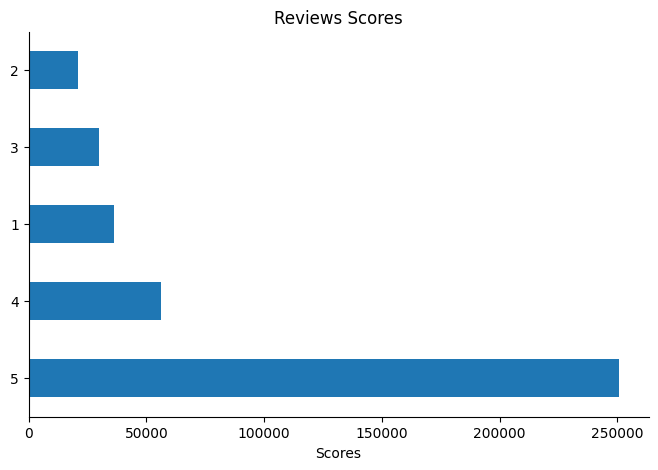

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
#ax.plot(range(10))

fig.patch.set_visible(False)

df['Score'].value_counts().plot(kind='barh', title='Reviews Scores', figsize=(8, 5))
plt.xlabel('Scores')
ax.spines[['right', 'top']].set_visible(False)
plt.savefig('/content/drive/MyDrive/DS/ВКР/NLP/Scors_Bar.png')
plt.show()

## NLTK. Text preprocessing

In [ ]:
nltk.download('words')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')

In [14]:
df['Text'].iloc[15]

"My daughter loves twizzlers and this shipment of six pounds really hit the spot. It's exactly what you would expect...six packages of strawberry twizzlers."

In [15]:
tokens = nltk.word_tokenize(df['Text'].iloc[15])
tokens[:10]

['My',
 'daughter',
 'loves',
 'twizzlers',
 'and',
 'this',
 'shipment',
 'of',
 'six',
 'pounds']

In [16]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('My', 'PRP$'),
 ('daughter', 'NN'),
 ('loves', 'VBZ'),
 ('twizzlers', 'NNS'),
 ('and', 'CC'),
 ('this', 'DT'),
 ('shipment', 'NN'),
 ('of', 'IN'),
 ('six', 'CD'),
 ('pounds', 'NNS')]

In [ ]:
nltk_pos = pd.read_excel('/content/drive/MyDrive/DS/ВКР/NLP/NLTK_pos_tags.xlsx')
nltk_pos

,Abbreviation,Meaning
0,CC,coordinating conjunction
1,CD,cardinal digit
2,DT,determiner
3,EX,existential there
4,FW,foreign word
5,IN,preposition/subordinating conjunction
6,JJ,This NLTK POS Tag is an adjective (large)
7,JJR,"adjective, comparative (larger)"
8,JJS,"adjective, superlative (largest)"
9,LS,list market


In [ ]:
# Group words by POS
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  My/PRP$
  daughter/NN
  loves/VBZ
  twizzlers/NNS
  and/CC
  this/DT
  shipment/NN
  of/IN
  six/CD
  pounds/NNS
  really/RB
  hit/VBD
  the/DT
  spot/NN
  ./.
  It/PRP
  's/VBZ
  exactly/RB
  what/WP
  you/PRP
  would/MD
  expect/VB
  .../:
  six/CD
  packages/NNS
  of/IN
  strawberry/NN
  twizzlers/NNS
  ./.)


In [ ]:
# Create stopword list:
df_stopwords = set(stopwords.words('english'))
df_stopwords.update(["br", "href"])
textt = " ".join(review for review in df.Text)
wordcloud = WordCloud(stopwords=df_stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

In [ ]:
# Create a word cloud of the 'Part Failure' column
from wordcloud import WordCloud
text = ' '.join(df['Part Failure'].astype(str).tolist())
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(text)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()